# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [6]:
import requests

#url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [7]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [8]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [136]:
results = soup.find('div', attrs={'class':'lister-list'})
print(results.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8179402/">
    <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5


Finding row length.

In [137]:
#scraped_movies = results.find_all('h3', class_='lister-item-header')
#scraped_ratings = results.find_all('div', class_='inline-block ratings-imdb-rating')
#scraped_metadata = results.find_all('div', class_='inline-block ratings-metascore')

results_length = len(results)
results_length

101

In [112]:
#results.find_all('h3', class_='lister-item-header').get_text().replace('\n', "").strip(" ")
results.find_all('h3', class_='lister-item-header')[0].get_text().replace('\n', "").strip(" ")

'1.Fate: The Winx Saga(2021– )'

In [80]:
results.find_all('span', class_='metascore favorable')[1].get_text().replace('\n', "").strip(" ")

'71'

Do the scrapping process here (please change this markdown with your explanation)

In [186]:
#initiating a tuple
temp = []

for i in range(50):

    #scrapping process
    title = results.find_all('h3', class_='lister-item-header')[i].get_text().replace('\n', "").strip(" ")
    ratings = results.find_all('div', class_='inline-block ratings-imdb-rating')[i].get_text().replace('\n', "").strip(" ")
    try :
        metascore = results.find_all('span', class_='metascore favorable')[i].get_text().replace('\n', "").strip(" ")
    except :
        metascore = 'n/a'
    cond = results.find_all('span', attrs={'name':'nv'})[i].get_text().replace('\n', "").strip(" ")
    if(cond.startswith('$') == False):
        votes = cond
    temp.append((title,ratings,metascore,votes))
    
temp

[('1.Fate: The Winx Saga(2021– )', '6.9', '65', '44,511'),
 ('2.The White Lotus(2021–2022)', '7.6', '71', '67,711'),
 ('3.Only Murders in the Building(2021– )', '8.1', '74', '96,354'),
 ('4.Abbott Elementary(2021– )', '8.2', '90', '13,724'),
 ('5.The Black Phone(2021)', '7.0', '69', '113,049'),
 ('6.Resident Alien(2021– )', '8.1', '68', '39,224'),
 ('7.American Horror Stories(2021– )', '6.2', '63', '20,777'),
 ('8.1883(2021–2022)', '8.8', '65', '63,196'),
 ('9.Reservation Dogs(2021– )', '8.1', '75', '14,619'),
 ('10.Spider-Man: No Way Home(2021)', '8.3', '71', '730,413'),
 ('11.La scuola cattolica(2021)', '5.7', '76', '730,413'),
 ('12.Dune: Part One(2021)', '8.0', '67', '1,798'),
 ('13.Licorice Pizza(2021)', '7.2', '62', '614,413'),
 ('14.Forsvinningen på Lørenskog(2021)', '6.1', 'n/a', '614,413'),
 ('15.Dopesick(2021)', '8.6', 'n/a', '105,554'),
 ("16.NCIS: Hawai'i(2021– )", '6.3', 'n/a', '1,065'),
 ('17.Mona Lisa and the Blood Moon(2021)', '6.2', 'n/a', '54,544'),
 ('18.The Little T

## Creating data frame & Data wrangling

Put the array into dataframe

In [187]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('title','ratings', 'metascore','votes'))
df

,title,ratings,metascore,votes
0,1.Fate: The Winx Saga(2021– ),6.9,65,"44,511"
1,2.The White Lotus(2021–2022),7.6,71,"67,711"
2,3.Only Murders in the Building(2021– ),8.1,74,"96,354"
3,4.Abbott Elementary(2021– ),8.2,90,"13,724"
4,5.The Black Phone(2021),7.0,69,"113,049"
5,6.Resident Alien(2021– ),8.1,68,"39,224"
6,7.American Horror Stories(2021– ),6.2,63,"20,777"
7,8.1883(2021–2022),8.8,65,"63,196"
8,9.Reservation Dogs(2021– ),8.1,75,"14,619"
9,10.Spider-Man: No Way Home(2021),8.3,71,"730,413"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [188]:
df.dtypes


title        object
ratings      object
metascore    object
votes        object
dtype: object

In [190]:
df.ratings = df.ratings.astype('float64')
df.votes = df.votes.str.replace(",","")
df.votes = df.votes.astype('int')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:ylabel='title'>

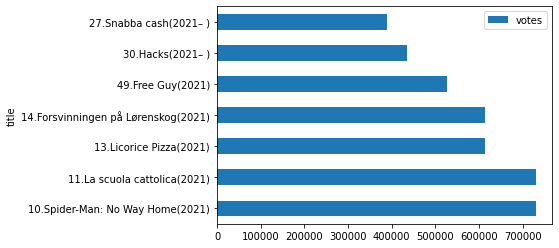

In [208]:
df.sort_values(by=['votes'], inplace=True, ascending=False)
top_7 = df.head(7)
top_7.plot.barh(x='title', y='votes')

<AxesSubplot:ylabel='title'>

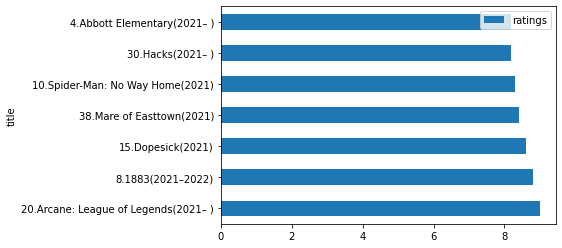

In [209]:
df.sort_values(by=['ratings'], inplace=True, ascending=False)
top_7_r = df.head(7)
top_7_r.plot.barh(x='title', y='ratings')


(Put your analysis and conclusion here.)
1. Berbasis vote, yang paling popular adalah Spiderman
2.Berbasis rating, yang terbaik adalah Arcane : Leage of Leagends

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.